In [1]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
classes=['Large','Small']

In [3]:
path=Path('Train Images/')

In [4]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path,train=".",valid_pct=0.1,ds_tfms=get_transforms(),size=320,num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['Large', 'Small']

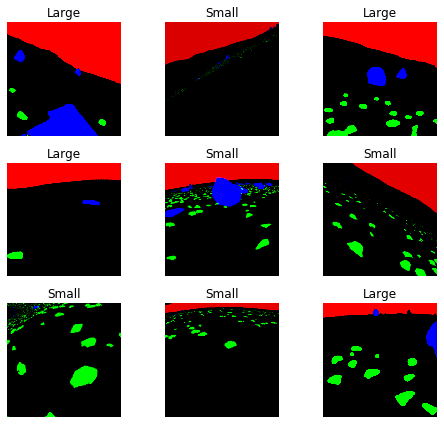

In [6]:
data.show_batch(rows=3,figsize=(7,6))

In [6]:
learn=cnn_learner(data,models.resnet18,metrics=error_rate)

In [7]:
import torch
torch.cuda.get_device_name(0)

'GeForce GTX 1050 Ti'

In [10]:
from fastai.callbacks import *

In [ ]:
learn.fit_one_cycle(24,callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='model-stage1')])

In [ ]:
learn.save('stage-1')

In [8]:
learn.load('model-stage1_9')

Learner(data=ImageDataBunch;

Train: LabelList (10799 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Large,Large,Large,Large,Large
Path: Train Images;

Valid: LabelList (1199 items)
x: ImageList
Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320),Image (3, 320, 320)
y: CategoryList
Large,Small,Small,Large,Large
Path: Train Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [13]:
torch.cuda.empty_cache()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(4,max_lr=slice(1e-04,5e-04),callbacks=[SaveModelCallback(learn, every='epoch', monitor='accuracy', name='model-stage1')])

epoch,train_loss,valid_loss,error_rate,time


RuntimeError: CUDA out of memory. Tried to allocate 76.00 MiB (GPU 0; 4.00 GiB total capacity; 2.87 GiB already allocated; 6.80 MiB free; 39.65 MiB cached)

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('model-stage1_7')

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
test['Class']=test['Class'].astype(str)

In [ ]:
test.shape[0]

In [ ]:
for i in range (test.shape[0]):
    image_path='Test Images/'+test.iloc[i]['Image_File']
    arr=plt.imread(image_path)
    img = pil2tensor(arr,dtype= np.float32)
    pred=learn.predict(Image(img))
    test.at[i,'Class']=str(pred[0])

In [ ]:
test.tail()

In [ ]:
test.to_csv('submission6.csv',index=False)

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
losses,idxs = interp.top_losses(10)
for p in data.valid_ds.x.items[idxs]:
    print(p)

